In [1]:
%%time
# Importing necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

Wall time: 39.3 s


In [2]:
# Importing data from csv file as pandas dataframe
data = pd.read_csv('train.csv')

df = data.copy()
# Printing the 10 rows
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
salePrice = df['SalePrice']

In [4]:
# print number of rows and columns
print("Row: ",df.shape[0])
print("Columns", df.shape[1])

Row:  1460
Columns 81


In [5]:
# Printing Column names
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Checking number of non null values and data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Understanding the central tendency and shape of the distribution of each columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Data Clearning

In [8]:
# Checking missing values in each columns
round(df.isnull().sum()/df.shape[0] * 100, 2).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
dtype: float64

In [9]:
# Columns with more 20% of missing values
rm_col = round(df.isnull().sum()/df.shape[0] * 100, 2)[(df.isnull().sum()/df.shape[0] * 100).values>20].keys()
print(rm_col)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [10]:
# Removing the columns with more than 20% missing values
df = df.drop(columns = rm_col, axis = 1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
round(df.isnull().sum()/df.shape[0] * 100, 2).sort_values(ascending=False).head(20)

LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
PavedDrive       0.00
WoodDeckSF       0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBath     0.00
dtype: float64

Dealing with year columns

In [12]:
# Dealing with columns with year
year_col = [col for col in df.columns if('year' in col.lower() or 'yr' in col.lower())]
year_col

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [13]:
df[year_col].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [14]:
for i in year_col:
    print(f"{i}: {df[i].max()} MAX")
    print(f"{i}: {df[i].min()} MIN")
    print()

YearBuilt: 2010 MAX
YearBuilt: 1872 MIN

YearRemodAdd: 2010 MAX
YearRemodAdd: 1950 MIN

GarageYrBlt: 2010.0 MAX
GarageYrBlt: 1900.0 MIN

YrSold: 2010 MAX
YrSold: 2006 MIN



In [15]:
# Taking difference between YrSold with other year features
df['years_after_built'] = df['YrSold'] - df['YearBuilt']
df['years_after_RemodAdd'] = df['YrSold'] - df['YearRemodAdd']
df['years_after_GarageBlt'] = df['YrSold'] - df['GarageYrBlt']

# Taking the difference between YrSold with its max value
df['year_sold_diff'] = df['YrSold'].max() - df['YrSold']

In [16]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,years_after_built,years_after_RemodAdd,years_after_GarageBlt,year_sold_diff
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,2,2008,WD,Normal,208500,5,5,5.0,2
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,5,2007,WD,Normal,181500,31,31,31.0,3
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,9,2008,WD,Normal,223500,7,6,7.0,2
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,2,2006,WD,Abnorml,140000,91,36,8.0,4
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,12,2008,WD,Normal,250000,8,8,8.0,2


In [17]:
# Removing the old year columns
df = df.drop(columns=year_col, axis=1)

In [18]:
new_year_col = [col for col in df.columns if 'year' in col]
new_year_col

['years_after_built',
 'years_after_RemodAdd',
 'years_after_GarageBlt',
 'year_sold_diff']

In [19]:
df[new_year_col].head()

,years_after_built,years_after_RemodAdd,years_after_GarageBlt,year_sold_diff
0,5,5,5.0,2
1,31,31,31.0,3
2,7,6,7.0,2
3,91,36,8.0,4
4,8,8,8.0,2


In [20]:
# numeric columns 
numeric_col = [col for col in df.columns if df[col].dtypes.name != 'object']
categorical_col = [col for col in df.columns if df[col].dtypes.name == 'object']

In [21]:
print(f"numeric: \n{df[numeric_col].shape}\n")
print(f"categorical: \n{df[categorical_col].shape}")

numeric: 
(1460, 38)

categorical: 
(1460, 38)


# Imputing missing values in numeric columns

In [22]:
df[numeric_col].isnull().sum()[df[numeric_col].isnull().sum().values != 0].sort_values(ascending=False)

LotFrontage              259
years_after_GarageBlt     81
MasVnrArea                 8
dtype: int64

In [23]:
num_missing_col = list(df[numeric_col].isnull().sum()[df[numeric_col].isnull().sum().values != 0].sort_values(ascending=False).keys())
num_missing_col

['LotFrontage', 'years_after_GarageBlt', 'MasVnrArea']

In [24]:
df[num_missing_col].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
years_after_GarageBlt,1379.0,29.306019,24.726881,0.0,6.0,28.0,47.0,107.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0


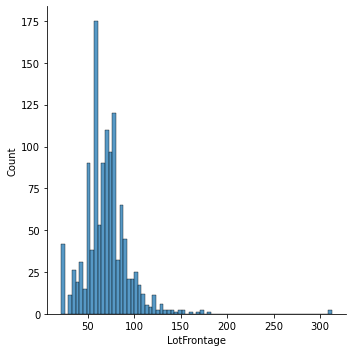

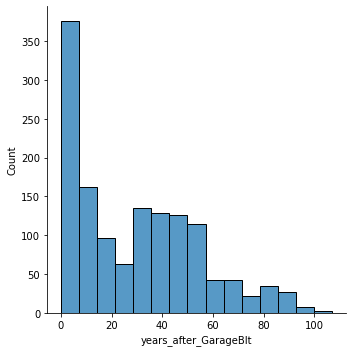

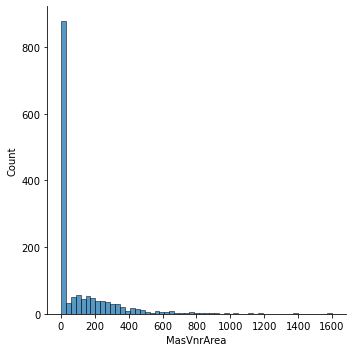

In [25]:
for i in num_missing_col:
    sns.displot(df[i])
    plt.show()

In [26]:
# Distribution is skewed so imputing missing values with median
for i in num_missing_col:
    df[i].fillna(df[i].median(), inplace=True)

In [27]:
df[numeric_col].isna().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
SalePrice                0
years_after_built        0
years_after_RemodAdd     0
years_after_GarageBlt    0
y

# Imputing missing values for categorical columns

In [28]:
df[categorical_col].isnull().sum()[df[categorical_col].isnull().sum() != 0].sort_values(ascending=False)

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
Electrical       1
dtype: int64

In [29]:
cat_missing_values = list(df[categorical_col].isnull().sum()[df[categorical_col].isnull().sum() != 0].sort_values(ascending=False).keys())
cat_missing_values

['GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrType',
 'Electrical']

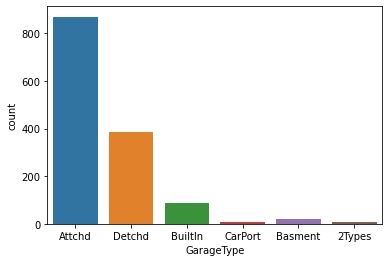

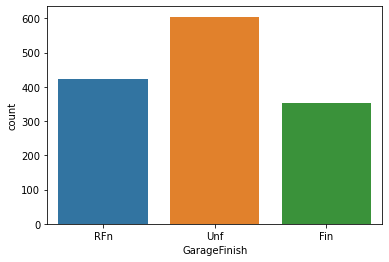

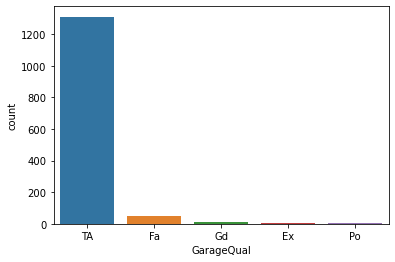

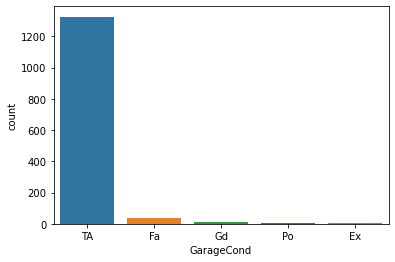

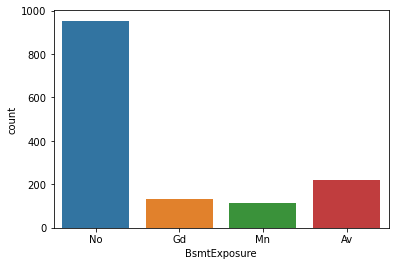

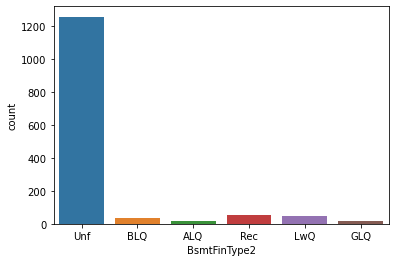

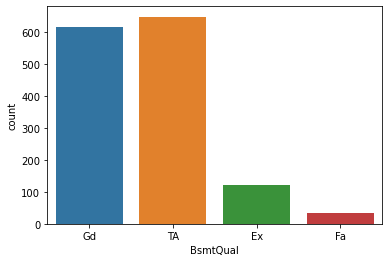

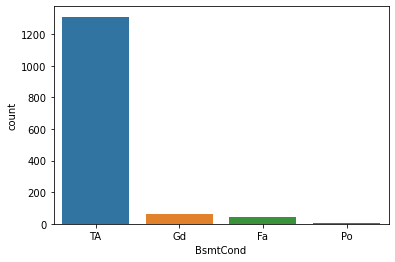

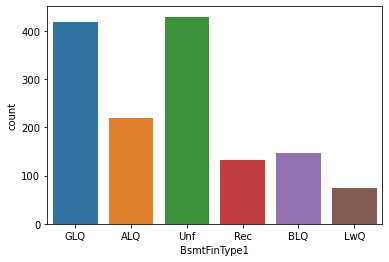

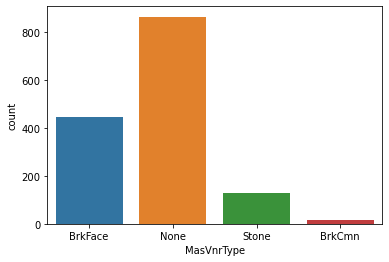

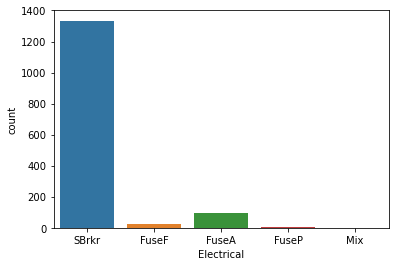

In [30]:
for i in cat_missing_values:
    sns.countplot(df[i])
    plt.show()

In [31]:
# Imputing missing values with the most occuring category
for i in cat_missing_values:
    df[i].fillna(df[i].mode()[0], inplace=True)
    

In [32]:
df[cat_missing_values].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtExposure    0
BsmtFinType2    0
BsmtQual        0
BsmtCond        0
BsmtFinType1    0
MasVnrType      0
Electrical      0
dtype: int64

# Checking For Outliers

In [33]:
df.skew(axis=0, skipna=True).sort_values(ascending = False)

MiscVal                  24.476794
PoolArea                 14.828374
LotArea                  12.207688
3SsnPorch                10.304342
LowQualFinSF              9.011341
KitchenAbvGr              4.488397
BsmtFinSF2                4.255261
ScreenPorch               4.122214
BsmtHalfBath              4.103403
EnclosedPorch             3.089872
MasVnrArea                2.677616
LotFrontage               2.409147
OpenPorchSF               2.364342
SalePrice                 1.882876
BsmtFinSF1                1.685503
WoodDeckSF                1.541376
TotalBsmtSF               1.524255
MSSubClass                1.407657
1stFlrSF                  1.376757
GrLivArea                 1.366560
BsmtUnfSF                 0.920268
2ndFlrSF                  0.813030
OverallCond               0.693067
TotRmsAbvGrd              0.676341
HalfBath                  0.675897
years_after_GarageBlt     0.668532
Fireplaces                0.649565
years_after_built         0.609030
BsmtFullBath        

In [34]:
df_no_skew_col = df.skew(axis=0, skipna=True)[df.skew(axis=0, skipna=True) > 1].sort_values(ascending=False).keys()
df_no_skew_col

Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'EnclosedPorch', 'MasVnrArea', 'LotFrontage', 'OpenPorchSF',
       'SalePrice', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', 'MSSubClass',
       '1stFlrSF', 'GrLivArea'],
      dtype='object')

In [35]:
df_no_skew = df.drop(columns=df_no_skew_col, axis=1)
df_no_skew.head()


,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition,years_after_built,years_after_RemodAdd,years_after_GarageBlt,year_sold_diff
0,1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,2,WD,Normal,5,5,5.0,2
1,2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,5,WD,Normal,31,31,31.0,3
2,3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,9,WD,Normal,7,6,7.0,2
3,4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,TA,TA,Y,2,WD,Abnorml,91,36,8.0,4
4,5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,TA,Y,12,WD,Normal,8,8,8.0,2


In [36]:
df_no_skew = df_no_skew.drop(columns=["Id"], axis=1)

In [37]:
new_numeric_col = [col for col in df_no_skew.columns if df_no_skew[col].dtype.name != 'object']
new_categorical_col = [col for col in df_no_skew.columns if df_no_skew[col].dtype.name == 'object']

print(new_numeric_col)
print()
print(new_categorical_col)

['OverallQual', 'OverallCond', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'years_after_built', 'years_after_RemodAdd', 'years_after_GarageBlt', 'year_sold_diff']

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [38]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x_train[new_numeric_col] = scaler.fit_transform(x_train[new_numeric_col])
# x_test[new_numeric_col] = scaler.fit_transform(x_test[new_numeric_col])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

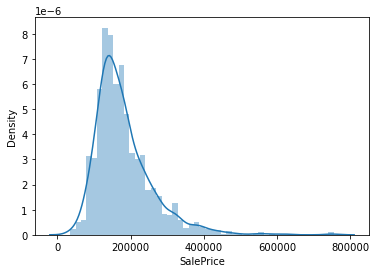

In [39]:
sns.distplot(salePrice)

In [40]:
salePrice = df['SalePrice'].apply(lambda x : np.log(x))

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

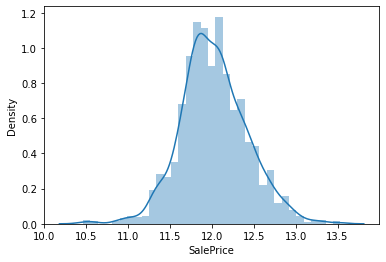

In [41]:
sns.distplot(salePrice)

# Creating Dummies (Incomplete)

In [42]:
dummy_col = pd.get_dummies(df_no_skew[new_categorical_col], drop_first=True)
df_no_skew = pd.concat([df_no_skew, dummy_col], axis=1)

In [43]:
df_no_skew.shape

(1460, 251)

In [44]:
df_final = df_no_skew.drop(new_categorical_col, axis=1)
df_final.head()

,OverallQual,OverallCond,BsmtUnfSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,5,150,854,1,2,1,3,8,0,...,0,0,0,0,1,0,0,0,1,0
1,6,8,284,0,0,2,0,3,6,1,...,0,0,0,0,1,0,0,0,1,0
2,7,5,434,866,1,2,1,3,6,1,...,0,0,0,0,1,0,0,0,1,0
3,7,5,540,756,1,1,0,3,7,1,...,0,0,0,0,1,0,0,0,0,0
4,8,5,490,1053,1,2,1,4,9,1,...,0,0,0,0,1,0,0,0,1,0


# Building Model

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x = df_final
y = salePrice

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [48]:
x_train[new_numeric_col].head()

,OverallQual,OverallCond,BsmtUnfSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,MoSold,years_after_built,years_after_RemodAdd,years_after_GarageBlt,year_sold_diff
135,7,6,1304,0,0,2,0,3,7,1,2,530,5,38,38,38.0,2
1452,5,5,0,0,1,1,0,2,5,0,2,525,5,1,1,1.0,4
762,7,5,732,783,0,2,1,3,7,0,2,614,6,1,1,1.0,0
932,9,5,1905,0,0,2,0,3,8,1,3,788,3,1,1,1.0,3
435,7,6,70,834,1,2,1,3,6,1,2,550,4,13,13,13.0,1


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[new_numeric_col] = scaler.fit_transform(x_train[new_numeric_col])
x_test[new_numeric_col] = scaler.fit_transform(x_test[new_numeric_col])

In [50]:
df_final.head()

,OverallQual,OverallCond,BsmtUnfSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,5,150,854,1,2,1,3,8,0,...,0,0,0,0,1,0,0,0,1,0
1,6,8,284,0,0,2,0,3,6,1,...,0,0,0,0,1,0,0,0,1,0
2,7,5,434,866,1,2,1,3,6,1,...,0,0,0,0,1,0,0,0,1,0
3,7,5,540,756,1,1,0,3,7,1,...,0,0,0,0,1,0,0,0,0,0
4,8,5,490,1053,1,2,1,4,9,1,...,0,0,0,0,1,0,0,0,1,0


In [51]:
x_train.head()

,OverallQual,OverallCond,BsmtUnfSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,0.636031,0.392266,1.643785,-0.802294,-0.814295,0.767840,-0.758517,0.135175,0.279234,0.594240,...,0,0,0,0,1,0,0,0,1,0
1452,-0.823057,-0.508624,-1.281383,-0.802294,1.112115,-1.069941,-0.758517,-1.098297,-0.948194,-0.943262,...,0,0,0,0,1,0,0,0,1,0
762,0.636031,-0.508624,0.360659,0.973582,-0.814295,0.767840,1.265515,0.135175,0.279234,-0.943262,...,0,0,0,0,0,0,0,0,1,0
932,2.095118,-0.508624,2.991965,-0.802294,-0.814295,0.767840,-0.758517,0.135175,0.892948,0.594240,...,0,0,0,0,1,0,0,0,1,0
435,0.636031,0.392266,-1.124357,1.089252,1.112115,0.767840,1.265515,0.135175,-0.334480,0.594240,...,0,1,0,0,0,0,0,0,1,0


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
# Creating function that returns the evaluation metrics
def metrics(t, p):
    mae = mean_absolute_error(t,p)
    #mse = ((t-p)**2).mean()
    mse = mean_squared_error(t,p)
    rmse = np.sqrt(mse)
    rsqr = r2_score(t,p)
    
    print('RMSE      :',rmse)
    print('MSE       :',mse)
    print('MAE       :',mae)
    print('R²        :',rsqr) 

In [55]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

Linear Regression

In [56]:
%%time
lin_reg_model = LinearRegression().fit(x_train, y_train)
lin_reg_predict = lin_reg_model.predict(x_test)
metrics(y_test, lin_reg_predict)

RMSE      : 18396720346.63879
MSE       : 3.384393195124336e+20
MAE       : 1710818381.8135116
R²        : -1.994971825769192e+21
Wall time: 2.41 s


LASSO Regression

In [57]:
%%time
l2_model = Lasso(alpha=0.001).fit(x_train, y_train)
l2_predict = l2_model.predict(x_test)
metrics(y_test, l2_predict)

RMSE      : 0.14569922803690166
MSE       : 0.021228265050549075
MAE       : 0.10469982514575389
R²        : 0.8748674038618898
Wall time: 1.81 s


In [58]:
%%time
l1_model = Ridge(alpha=0.2).fit(x_train, y_train)
l1_predict = l1_model.predict(x_test)
metrics(y_test, l1_predict)

RMSE      : 0.14925982665554763
MSE       : 0.022278495853244124
MAE       : 0.10718511267809859
R²        : 0.8686766903687
Wall time: 262 ms


In [59]:
%%time
dt_model = DecisionTreeRegressor().fit(x_train, y_train)
dt_predict = dt_model.predict(x_test)
metrics(y_test, dt_predict)

RMSE      : 0.23482713953998796
MSE       : 0.055143785464532975
MAE       : 0.16378585142254123
R²        : 0.6749482343644695
Wall time: 108 ms


In [60]:
%%time
rf_model = RandomForestRegressor(n_estimators=100).fit(x_train, y_train)
rf_predict = rf_model.predict(x_test)
metrics(y_test, rf_predict)

RMSE      : 0.1603721749193685
MSE       : 0.025719234488368527
MAE       : 0.11132806485204308
R²        : 0.8483948370462271
Wall time: 1.48 s


In [61]:
%%time
gb_model = GradientBoostingRegressor().fit(x_train, y_train)
gb_predict = gb_model.predict(x_test)
metrics(y_test, gb_predict)

RMSE      : 0.15000113311376534
MSE       : 0.022500339935413546
MAE       : 0.1063413091380502
R²        : 0.8673690033828048
Wall time: 491 ms


In [62]:
%%time
ab_model = AdaBoostRegressor().fit(x_train, y_train)
ab_predict = ab_model.predict(x_test)
metrics(y_test, ab_predict)

RMSE      : 0.1803030321608196
MSE       : 0.03250918340638555
MAE       : 0.1362074971399903
R²        : 0.8083706554311286
Wall time: 418 ms


In [64]:
%%time
xgb_model = XGBRegressor(n_estimators=200).fit(x_train, y_train)
xgb_predict = xgb_model.predict(x_test)
metrics(y_test, xgb_predict)

RMSE      : 0.15414560971987998
MSE       : 0.023760868995913557
MAE       : 0.11052543940703939
R²        : 0.8599386611729114
Wall time: 886 ms


In [63]:
%%time
knn_model = KNeighborsRegressor().fit(x_train, y_train)
knn_predict = knn_model.predict(x_test)
metrics(y_test, knn_predict)

RMSE      : 0.17368799598800472
MSE       : 0.030167519950329146
MAE       : 0.11784038883203263
R²        : 0.8221738761295859
Wall time: 32 ms


Model Performance

In [65]:
def model_eval_metric(model,X_test,Y_test,Y_predict):
    r_squared = model.score(X_test, Y_test)
    mse = mean_squared_error(Y_predict, Y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_predict, Y_test)
    return r_squared,mse,rmse, mae

In [66]:
eval_metric=[]
ml_algo=['Linear Regression','LASSO', 'Ridge', 'Decision Tree','Random Forest','Gradient Boost', 'Ada Boost', 'XGBoost', 'KNN']
ml_models= [lin_reg_model,l2_model,l1_model,dt_model,rf_model,gb_model,ab_model,xgb_model,knn_model]
predictions =[lin_reg_predict,l2_predict,l1_predict,dt_predict,rf_predict,gb_predict,ab_predict,xgb_predict,knn_predict]
i=0
for mod in ml_algo:
    R_SQR,MSE,RMSE,MAE = model_eval_metric(ml_models[i],x_test,y_test,predictions[i])
    eval_metric.append([mod,R_SQR,MSE,RMSE,MAE])
    i=i+1
model_performance=pd.DataFrame(eval_metric,columns =['Model','R-Squared','MeanSquaredError','RootMeanSquaredError',
                                                     'MeanAbsoluteError'])

In [67]:
model_performance.sort_values(by='RootMeanSquaredError')

,Model,R-Squared,MeanSquaredError,RootMeanSquaredError,MeanAbsoluteError
1,LASSO,8.748674e-01,2.122827e-02,1.456992e-01,1.046998e-01
2,Ridge,8.686767e-01,2.227850e-02,1.492598e-01,1.071851e-01
5,Gradient Boost,8.673690e-01,2.250034e-02,1.500011e-01,1.063413e-01
7,XGBoost,8.599387e-01,2.376087e-02,1.541456e-01,1.105254e-01
4,Random Forest,8.483948e-01,2.571923e-02,1.603722e-01,1.113281e-01
8,KNN,8.221739e-01,3.016752e-02,1.736880e-01,1.178404e-01
6,Ada Boost,8.083707e-01,3.250918e-02,1.803030e-01,1.362075e-01
3,Decision Tree,6.749482e-01,5.514379e-02,2.348271e-01,1.637859e-01
0,Linear Regression,-1.994972e+21,3.384393e+20,1.839672e+10,1.710818e+09


#Hyperparameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
def hyperParameterTuning(x_train, y_train, model):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }



    gsearch = GridSearchCV(estimator = model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(x_train,y_train)

    return gsearch.best_params_

In [70]:
%%time
hyperParameterTuning(x_train, y_train, xgb_model)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


KeyboardInterrupt: 

In [72]:
from sklearn.model_selection import cross_val_score

In [74]:
%%time
scores = cross_val_score(xgb_model, x_train, y_train, cv=10)

Wall time: 8.65 s


In [75]:
xgb_tuned_model = XGBRegressor(colsample_bytree=0.7,
                               learning_rate=0.1,
                               max_depth=3,
                               min_child_weight=3,
                               n_estimators=500,
                               objective='reg:squarederror',
                               subsample=0.7).fit(x_train, y_train)

xgb_tuned_predict = xgb_tuned_model.predict(x_test)
metrics(y_test, xgb_tuned_predict)

RMSE      : 0.14439993391972875
MSE       : 0.020851340916022032
MAE       : 0.10049792127661789
R²        : 0.8770892291211922


In [78]:
import joblib

In [79]:
joblib.dump(xgb_tuned_model, "xgb_tuned_model.pkl")

['xgb_tuned_model.pkl']